# Customer segmentation using k-means clustering

In [5]:
#%% dependencies

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
home = (r'C:\Users\Ashutosh Gaur\My Drive\edupunk').replace('\\', '/')

# import dataset
dataset = pd.read_csv(home + '/metadata/data/mall_customers.csv')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.head(5)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [10]:
dataset.shape

(200, 5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)'>

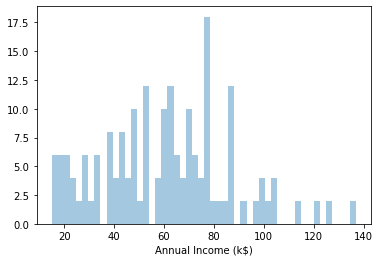

In [11]:
#%% viz to explore relationship between variables

# histogram for annual income column
sns.distplot(dataset['Annual Income (k$)'], kde=False, bins=50)

<AxesSubplot:xlabel='Spending Score (1-100)'>

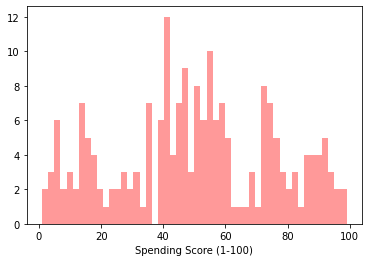

In [12]:
# histogram for spending score
sns.distplot(dataset['Spending Score (1-100)'], kde=False, bins=50, color='red')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

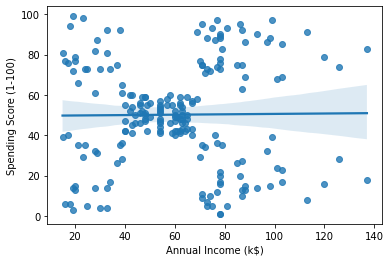

In [13]:
# plotting regression plot for annual income against spending score
# From the straight line in the below output, you can infer that there is no linear relationship between annual income and spending.
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

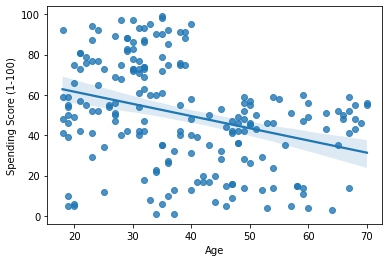

In [14]:
# plot a linear regression line between the age column and the spending score
# The output confirms an inverse linear relationship between age and spending score. It can be inferred from the output that young people have higher spending compared to older people.
sns.regplot(x='Age', y='Spending Score (1-100)', data=dataset)

In [15]:
#%% performing k-means clustering

# We want to perform K-Means clustering based on the annual income and spending score columns because we want to target a customer base with high income and high spending scores.

dataset = dataset.filter(['Annual Income (k$)', 'Spending Score (1-100)'], axis=1)
dataset.head(5)

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [16]:
# train the model using KMeans class
km_model = KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [17]:
# centroid values
print(km_model.cluster_centers_)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [87.         18.63157895]
 [48.26       56.48      ]]


In [18]:
# predicted label values
print(km_model.labels_)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


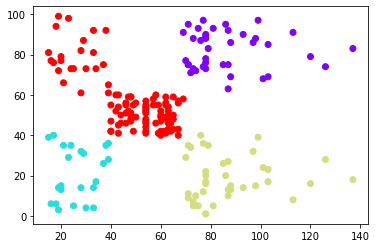

In [19]:
#%% visualize clsuters

# data points
plt.scatter(dataset.values[:, 0], dataset.values[:, 1], c=km_model.labels_, cmap='rainbow')

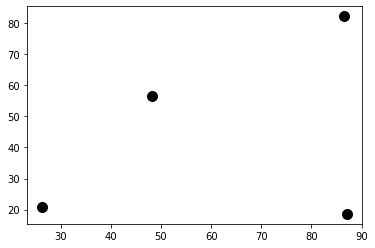

In [20]:
# centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


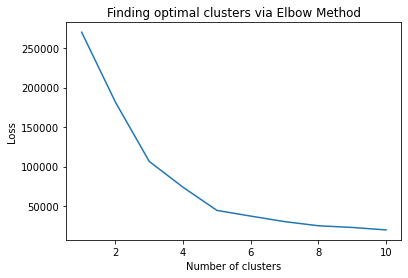

In [21]:
#%% elbow method for finding k value

# We have been randomly initializing the value of K or the number of clusters. However, we do not exactly know how many segments of customers are there in our dataset. To find the optimal number of customer segments, we need to find the optimal number of K because K defines the number of clusters.
# There is a way to find the ideal number of clusters. The method is known as the elbow method.

# training KMeans on K values from 1 to 10
loss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(dataset)
    loss.append(km.inertia_)

# printing loss against number of clusters
plt.plot(range(1, 11), loss)
plt.title('Finding optimal clusters via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.show()

In [22]:
# It can be seen that the value of inertia didn’t decrease much after five clusters
# segmenting customer data into five groups by creating five clusters
km_model = KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

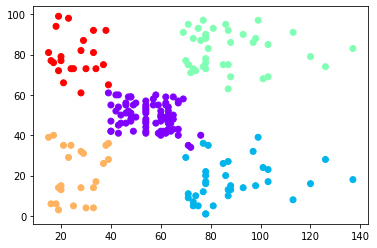

In [23]:
#%% visualize clsuters

# From the above output, you can see that the customers are divided into five segments. The customers in the middle of the plot (in purple) are the customers with average income and average spending. The customers belonging to the red cluster are the ones with low income and low spending. You need to target the customers who belong to the top right cluster (sky blue). These are the customers with high incomes and high spending in the past, and they are more likely to spend in the future, as well. So any new marketing campaigns or advertisements should be directed to these customers.

# data points
plt.scatter(dataset.values[:, 0], dataset.values[:, 1], c=km_model.labels_, cmap='rainbow')